# Simple Linear Regression (SLR)

## What We'll Accomplish in This Notebook

In this notebook we'll introduce regression tasks with the most basic regression model, simple linear regression (slr). Specifically we will:
- Discuss what a regression task is,
- Introduce the stastical model behind simple linear regression,
- Learn about train test splits,
- Look at explanatory slr, and
- End with predictive slr.

Let's go!

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## A Note on Math

This will be our first notebook with a fair amount of math. While the specific math we cover today isn't the most advanced thing we'll cover, if at any point you find yourself lost in the math of any of the boot camp's notebooks that's okay! Don't feel like you need to understand everything the first time you see it in lecture. Also, it is possible to understand how to apply various data science algorithms and techniques without fully understanding the math working behind the scenes.

Finally, if at any point you have a question feel free to ask me or any of our breakout room leads. If you don't feel comfortable asking during lecture or a breakout session you can always message me in Slack.

## Regression Modeling

Recall our set up from the previous notebook.

We've collected some features, $X$, and some output data, $y$, and we believe there is some true relationship between the two:
$$
y = f(X) + \epsilon,
$$
called the <i>model</i>.

Regression tasks are the name that we'll give problems in which the output data is a numeric type. It is common to say that we are regressing $y$ on $X$.

## Simple Linear Regression

We'll first learn the algorithm and then address concerns specific to explanatory and predictive settings. Let's use an example to introduce the concept.

You work for ESPN and you think that you can predict a baseball team's win total if you know their run differential. 

<i>For non-baseball fans a run is considered $1$ point in baseball, and run differential is the number of runs your team scores, denoted as $r$, minus the number of runs your team gave up, denoted as $ra$ for runs allowed, so run differential is $rd = r - ra$.</i>

This is a regression problem, we want to predict a quantitative outcome, wins, using some feature, run differential.

Let's look at some data.

In [2]:
# Use pandas to import the data
# it is stored in the baseball_run_diff.csv file
baseball = pd.read_csv("baseball_run_diff.csv")


# This will tell us about the df
print("There are",len(baseball),"observations in the baseball df.")
print("The columns are",list(baseball.columns))

# Look at 5 randomly sampled rows
baseball.sample(5)

There are 540 observations in the baseball df.
The columns are ['teamID', 'yearID', 'lgID', 'G', 'W', 'L', 'R', 'RA', 'RD']


,teamID,yearID,lgID,G,W,L,R,RA,RD
473,SEA,2016,AL,162,86,76,768,707,61
0,ANA,2001,AL,162,75,87,691,730,-39
462,LAA,2016,AL,162,74,88,717,727,-10
86,SLN,2003,NL,162,85,77,876,796,80
23,SDN,2001,NL,162,79,83,789,812,-23


### Training Test Split

You may be tempted to start exploring this data. However, since we'll eventually be building a predictive model on top of it we want to set aside a small subset of the data aside for testing purposes. This is known as making the <i>train test split</i>.

The <i>train set</i> is the one we build our model on. A machine learning algorithm uses the train set to estimate the true relationship the best it can. 

Good performance on the training data does not guarantee good predictive performance. So in order to get a sense of how good a particular model is we set aside a <i>test set</i> at the beginning of the model building process. This subset of the total data set is meant to allow you to test your model on data it didn't train on, therefore allowing you to simulate predicting on entirely new data. Typically this data isn't touched until the end of the model building process.

For a number of reasons the training data can lead us to believe we have a better model than we actually have. The test data exists as a sanity check to see if the model is as good as the training data tells us.

##### Using `pandas` for a train test split

So let's use `pandas` to make our train test split.

In [3]:
## first make a copy of the original dataframe
# this is due to the way python internally 
# stores objects
baseball_copy = baseball.copy()

## Now use sample to make a random sample
## frac allows us to choose a fraction of the df
## it is common to set aside 25% for testing
baseball_train = baseball_copy.sample(frac = .75, random_state = 440)

## now use drop and the train index to make test
baseball_test = baseball_copy.drop(baseball_train.index)

In [4]:
## Now look at the training set head
baseball_train.head(10)

,teamID,yearID,lgID,G,W,L,R,RA,RD
385,SLN,2013,NL,162,97,65,783,596,187
39,COL,2002,NL,162,73,89,778,898,-120
335,CHN,2012,NL,162,61,101,613,759,-146
125,CHN,2005,NL,162,79,83,703,714,-11
158,COL,2006,NL,162,76,86,813,812,1
239,WAS,2008,NL,161,59,102,641,825,-184
494,MIA,2017,NL,162,77,85,778,822,-44
59,TOR,2002,AL,162,78,84,813,828,-15
486,CIN,2017,NL,162,68,94,753,869,-116
92,ATL,2004,NL,162,96,66,803,668,135


Now we can explore!

Let's examine any potential relationship between wins (coded as `W`) and run differential (coded as `RD`).

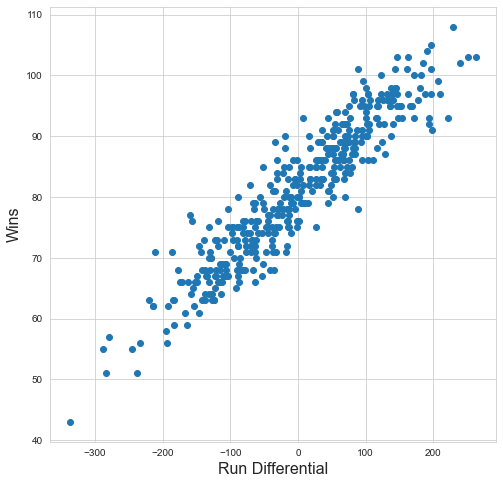

In [5]:
## We'll use plt.scatter for this

## first make a figure
## this makes a figure that is 8 units by 8 units
plt.figure(figsize = (8,8))

## plt.scatter plots RD on the x and W on the y
plt.scatter(baseball_train.RD, baseball_train.W)

## Always good practice to label well when
## presenting a figure to others
## place an xlabel
plt.xlabel("Run Differential", fontsize =16)

## place a ylabel
plt.ylabel("Wins", fontsize = 16)

## type this to show the plot
plt.show()

#### What do you see here?


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### The SLR Model

Let $y$ denote our output variable, $X$ denote our features (in this case feature), and $\epsilon \sim N(0,\sigma^2)$. Then our statistical model for slr is:
$$
y = \beta_0 + \beta_1 X + \epsilon 
$$
for some constants $\beta_0$ and $\beta_1$.

Thus for the $i^{\text{th}}$ observation we say that:
$$
y_i = \beta_0 + \beta_1 X_i + \epsilon_i,
$$
where $\epsilon_i$ is a draw from $\epsilon$'s distribution. Importantly we also assume that the observations are independent of one another.

### Estimating the Model - What is "Best"

While the idea of "best" is slightly different between predictive and explanatory modeling, fitting the model is identical in both cases. Let $\hat{\beta_0}$ and $\hat{\beta_1}$ denote our estimates from the data. We want to choose $\hat{\beta_0}$ and $\hat{\beta_1}$ so that the $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} X_i$ are collectively as close to the $y_i$ as possible. A common way to measure collective closeness is by considering the sum of the square errors, in particular we'll use the <i>Mean Square Error (MSE)</i> or equivalently the <i>Root Mean Square Error</i> (=$\sqrt{\text{MSE}}$). 

Suppose our estimates are $\hat{\beta_0}$ and $\hat{\beta_1}$, then the MSE for the model using those estimates is
$$
MSE = \frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2 = \frac{1}{n}\sum_{i=1}^n(\hat{\beta_0} + \hat{\beta_1}X_i - y_i)^2.
$$
The "best" estimates will be the $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimize the MSE. Doing some Calculus you can derive that this gives the following best linear estimates for the $\hat{\beta}$s:
$$
\hat{\beta_1} = \frac{\sum_{i=1}^n\left(X_i - \overline{X}\right)\left(y_i - \overline{y}\right)}{\sum_{i=1}^n\left(X_i - \overline{X}\right)^2} = \frac{\text{cov}(X,y)}{\sigma^2_{X}}, \text{ and}
$$
<br>
$$
\hat{\beta_0} = \overline{y} - \hat{\beta_1}\overline{X}.
$$
These two formulas give the <i>least squares coefficient estimates</i> for simple linear regression.

Let's do a little coding and calculate the least squares estimate for regressing wins on run differential.

In [6]:
## Note you can get a column's variance using .var()
## Note you can get a covariance matrix from a dataframe using .cov()

## We get the means here
X_bar = baseball_train.RD.mean()
y_bar = baseball_train.W.mean()


## We get the covariance and variance
cov = baseball_train[['RD','W']].cov().iloc[0,1]
var = baseball_train.RD.var()

## Here we calculate beta_1_hat
beta_1_hat = cov/var

## Here we calculate beta_0_hat
beta_0_hat = y_bar - beta_1_hat*X_bar


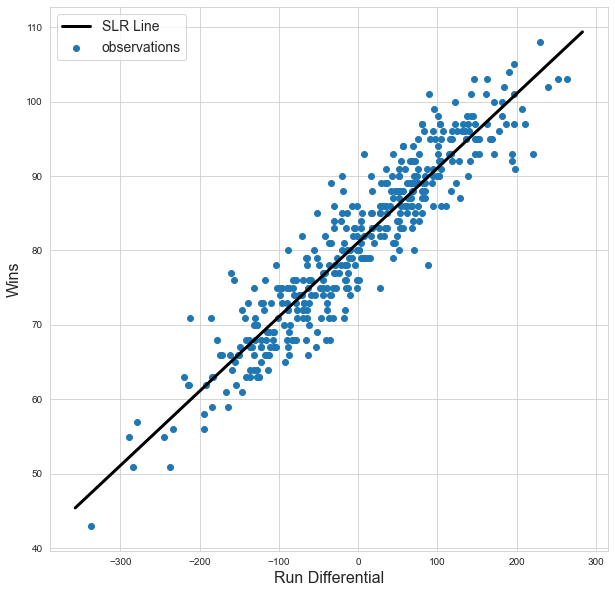

In [7]:
## We can produce a plot with the fitted line here

## Use the x as the input for your line, i.e. beta_0_hat + beta_1_hat*x
min_rd = baseball_train.RD.min()
max_rd = baseball_train.RD.max()
padding = 20
x = np.linspace(min_rd - padding,max_rd + padding,1000)

plt.figure(figsize = (10,10))

# plt.scatter plots RD on the x and W on the y
plt.scatter(baseball_train.RD, baseball_train.W, label = "observations")

# Now add mean prediction line
plt.plot(np.linspace(min_rd - padding,max_rd + padding,1000),
            beta_0_hat + beta_1_hat*np.linspace(min_rd - padding,max_rd + padding,1000), 'k',
            label="SLR Line",
            linewidth = 3)

# Always good practice to label well when
# presenting a figure to others
# place an xlabel
plt.xlabel("Run Differential", fontsize =16)

# place a ylabel
plt.ylabel("Wins", fontsize = 16)

# Add a legend
plt.legend(fontsize=14)

# type this to show the plot
plt.show()

### Break for Questions

<br>
<br>
<br>
<br>

### Your Turn

Now it's your turn to practice building a SLR model.

We'll look at the `carseats` data set stored as `carseats.csv`. The data comes from <a href="https://www.statlearning.com/">Introduction to Statistical Learning in R</a>. and looks at various variables related to the sales of child car seats at $400$ stores. Each row is a store. The thing we'd like to predict is `Sales`. We'll return to this data set in later notebooks. For now try to build a SLR model regressing `Sales` on `Price`. Make a plot that includes your regression line and the training data.

Remember to just get as far as you can in the time alotted, you can always come back to the notebook after lecture is over.

In [8]:
## Code Here - 
## Read in the Data and make a train test split with pandas
## Look at the head of the dataframe

## Sample Answer
carseats = pd.read_csv('carseats.csv')

carseats_train = carseats.copy().sample(frac=.75,random_state = 440)
carseats_test = carseats.copy().drop(carseats_train.index)


carseats_train.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
328,3.15,117,66,1,65,111,Bad,55,11,Yes,Yes
266,9.10,128,93,12,343,112,Good,73,17,No,Yes
310,9.53,175,65,29,419,166,Medium,53,12,Yes,Yes
96,9.48,147,42,10,407,132,Good,73,16,No,Yes
101,6.20,128,93,0,89,118,Medium,34,18,Yes,No


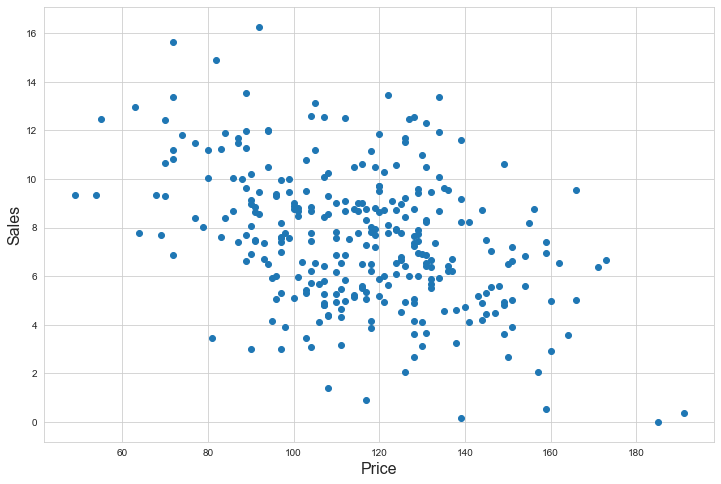

In [9]:
## Code Here

## Make a scatter plot examining the relationship between
## Sales and Price here

## Sample Answer

plt.figure(figsize=(12,8))

plt.scatter(carseats_train.Price,carseats_train.Sales)

plt.xlabel("Price", fontsize=16)
plt.ylabel("Sales", fontsize=16)

plt.show()

In [10]:
### Code Here

## Calculate beta_1_hat and beta_0_hat
## for the model regressing Sales on Price

## Sample Answer

## Get the means here
X_bar_cars = carseats_train.Price.mean()
y_bar_cars = carseats_train.Sales.mean()


## Get the covariance and variance
cov_cars = carseats_train[['Sales','Price']].cov().iloc[0,1]
var_cars = carseats_train.Price.var()

## Calculate beta_1_hat
beta_1_hat_cars = cov_cars/var_cars

## Calculate beta_0_hat
beta_0_hat_cars = y_bar_cars - beta_1_hat_cars*X_bar_cars

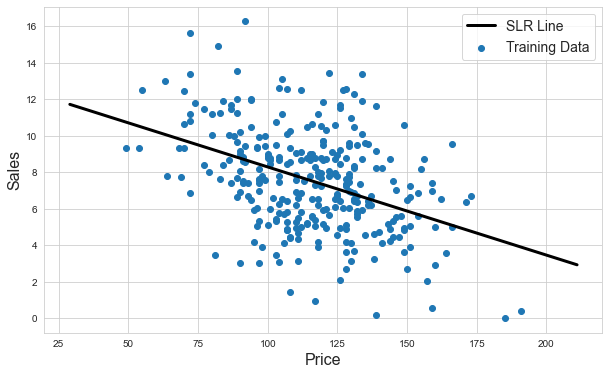

In [11]:
### Code Here

## plot your regression line on top of the training data here

## Sample Answer

## Use the x as the input for your line, i.e. beta_0_hat + beta_1_hat*x
min_price = carseats_train.Price.min()
max_price = carseats_train.Price.max()
padding = 20
x = np.linspace(min_price - padding,max_price + padding,1000)



## Sample Answer
plt.figure(figsize = (10,6))

# plt.scatter plots RD on the x and W on the y
plt.scatter(carseats_train.Price, carseats_train.Sales, label = "Training Data")

# Now add mean prediction line
plt.plot(np.linspace(min_price - padding,max_price + padding,1000),
            beta_0_hat_cars + beta_1_hat_cars*np.linspace(min_price - padding,max_price + padding,1000), 'k',
            label="SLR Line",
            linewidth = 3)

# Always good practice to label well when
# presenting a figure to others
# place an xlabel
plt.xlabel("Price", fontsize =16)

# place a ylabel
plt.ylabel("Sales", fontsize = 16)

# Add a legend
plt.legend(fontsize=14)

# type this to show the plot
plt.show()

## SLR - Explanatory Modeling

Let's now examine simple linear regression from the perspective of explanatory modeling.

A first step is to discuss the theoretical assumptions we make on the data and how to check that they are satisfied. In explanatory modeling this is an important step because certain assumptions allow us to prove statistical properties about the least squares estimates that are desirable, and allow us to later derive uncertainty bounds on our estimates.

### Assumption 1 - A Linear Relationship

There exists a linear relationship between $y$ and $X$. This one is pretty straightforward. If we are going to model $y$ as a linear function of $X$ then we better think that one actually exists.

#### How to check

##### Make a plot

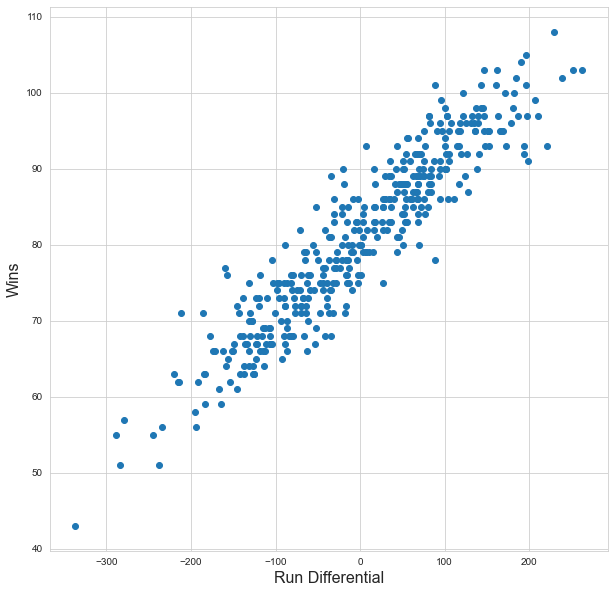

In [12]:
# We'll use plt.scatter for this

# first make a figure
# this makes a figure that is 10 units by 10 units
plt.figure(figsize = (10,10))

# plt.scatter plots RD on the x and W on the y
plt.scatter(baseball_train.RD, baseball_train.W)

# Always good practice to label well when
# presenting a figure to others
# place an xlabel
plt.xlabel("Run Differential", fontsize =16)

# place a ylabel
plt.ylabel("Wins", fontsize = 16)

# type this to show the plot
plt.show()

or

##### Look at the Pearson Correlation, $\rho$

This is a statistical measure of the <i>strength of the linear relationship</i> between $y$ and $X$. Here's the formula:
$$
\rho = \frac{Cov(y,X)}{\sigma_X \sigma_y}
$$

You can approximate $\rho$ with the sample covariance and sample standard deviations, the approximation is $r$.

In [13]:
## We calculate the Pearson correlation for the baseball data here

r = cov/(np.sqrt(baseball_train.RD.var())*np.sqrt(baseball_train.W.var()))



print("The pearson coef is",np.round(r,4))

The pearson coef is 0.9334


In general, the Pearson Correlation is bounded between $-1$ and $1$ with more positive values indicating a strong positive linear relationship, and more negative values indicating a strong negative linear relationship. Our correlation of $0.933$ here indicates that wins and run differential have a strong positive linear relationship.

For those looking for more statistical rigor, check out this page, <a href="https://online.stat.psu.edu/stat501/lesson/1/1.9">https://online.stat.psu.edu/stat501/lesson/1/1.9</a> to see how you can actually perform a hypothesis test on whether or not there is statistically significant evidence that $\rho \neq 0$.

Note that getting a $\rho$ close to $0$ does NOT mean there is no relationship, just no linear relationship. For example:

In [14]:
# Let's find the correlation coefficient of the following data
# Docs: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

x = np.linspace(-2,2,1000)

# y = x^2
y = np.power(x,2)

np.corrcoef(x,y)

array([[ 1.00000000e+00, -1.23465641e-16],
       [-1.23465641e-16,  1.00000000e+00]])

### Assumption 2 - All Observations are Independent

We also assume that each observation in the data set is independent from all other observations.

#### How to Check

This is slightly harder to check then assessing a linear fit. But there are some ways to test.

##### Thinking About How the Data Was Collected

This approach helps if you know something about the data collection process. For example, if you wanted to know something about OSU undergrads and you randomly sampled people from a list in the registrars office that would produce independent observations. But if you randomly sampled people from a single Calculus Class and a single Art History Class then your observations are likely dependent.

In our baseball example, we do have reason for concern. The data is produced from year after year observations of the same teams. We did sample our data randomly, but its possible that there is time dependence or team dependence. Which takes us to the next way to check.

##### Making more plots

Plot your residuals (this is what we call the difference between the predicted values and the actual values, $y_i - \hat{y_i}$) against your feature and other variables of concern. Then you examine the plots to see if there is an obvious relationship. Let's do that below.

In [15]:
## Residuals are actual values minus estimated values
res =  baseball_train.W.values - (beta_0_hat + beta_1_hat * baseball_train.RD.values)

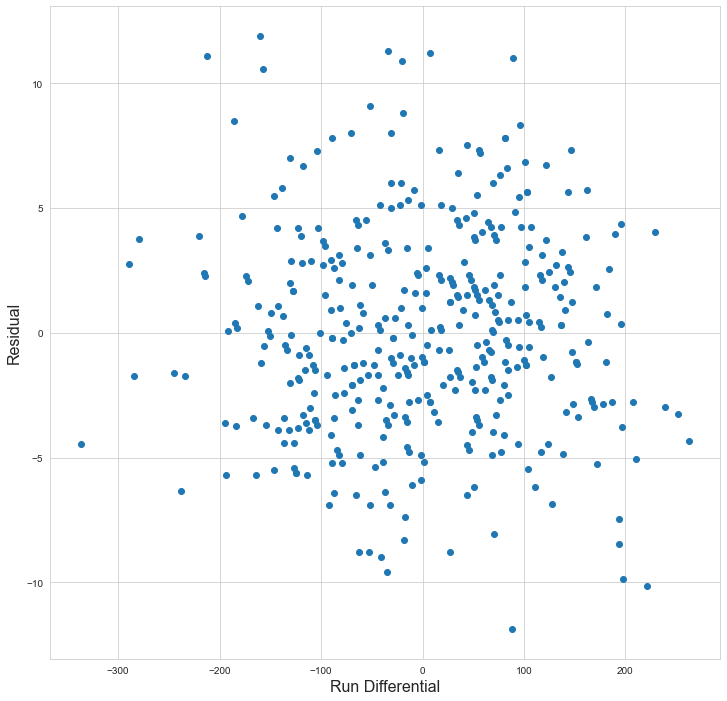

In [16]:
## First plot of rd vs residual

plt.figure(figsize = (12,12))

plt.scatter(baseball_train.RD,res)

plt.xlabel("Run Differential", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

plt.show()

Looking at the plot of run differential vs residual it seems that the two have no obvious relationship, which is a good sign for our independence assumption. Let's move on to residual vs year.

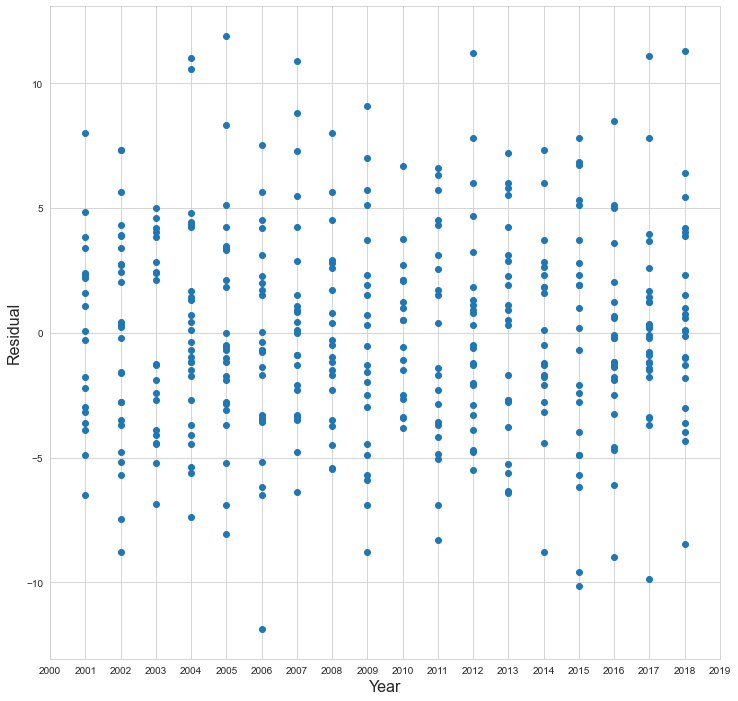

In [17]:
## plot year vs residual

plt.figure(figsize = (12,12))

plt.scatter(baseball_train.yearID,res)

plt.xlabel("Year", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

# Note this allows you to set specific tick mark values
plt.xticks(range(2000,2020))

plt.show()

Another blob with no obvious pattern, excellent! This is more good news for us in terms of the independence assumption. Let's now look at residuals vs team.

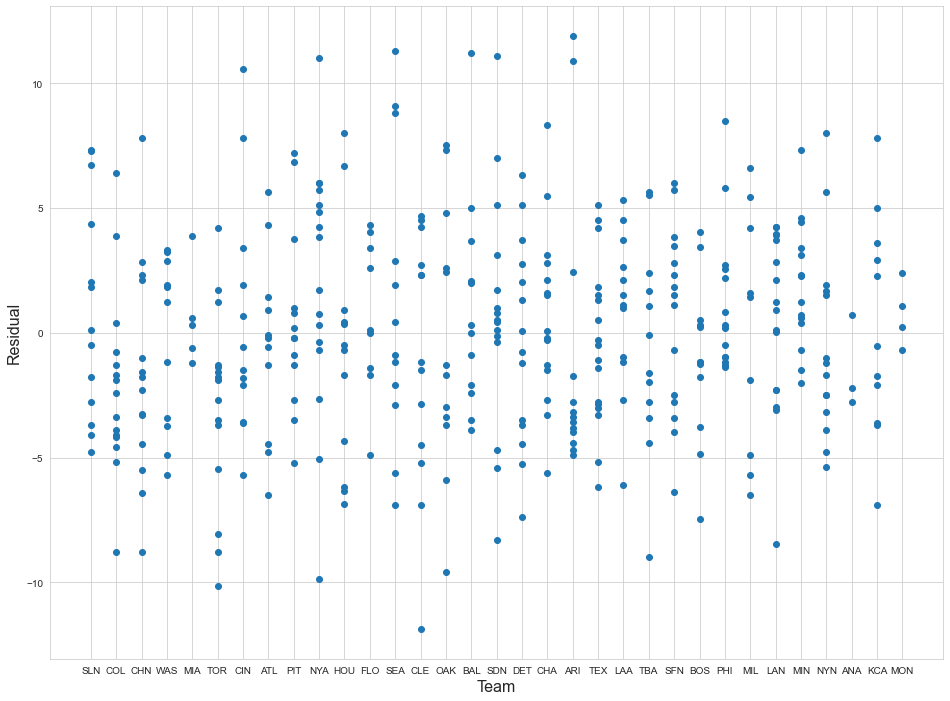

In [18]:
## plot team vs residual

plt.figure(figsize = (16,12))

plt.scatter(baseball_train.teamID,res)

plt.xlabel("Team", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)


plt.show()

This one is a little worrying. Some teams seem to have their wins consistently overestimated (a negative residual) like ARIzona, while others are more likely to be underestimated (a positive residual) like MINnesota. So there is reason to believe that residuals are not independent over team. There are ways to handle this, but they fall out of the scope of this notebook. For this data our violation doesn't seem too egregious so we'll soldier on. 

### Assumption 3 - The Residuals are Normally Distributed with Mean 0 and Equal Variance

The final assumption is on the distribution of the residuals. We say that $\epsilon_i \sim N(0,\sigma^2)$ for all $i$. The assumption on variance is called the homoscedasticity assumption.

#### How to Check Normality

##### Make More Plots!

We can make a histogram of the residuals to check for a bell curve.

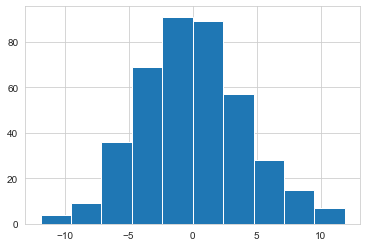

In [19]:
# plot a histogram of the residuals here

plt.hist(res)

plt.show()

In [20]:
# This package allows us to make a q-q plot
import statsmodels.api as sm 

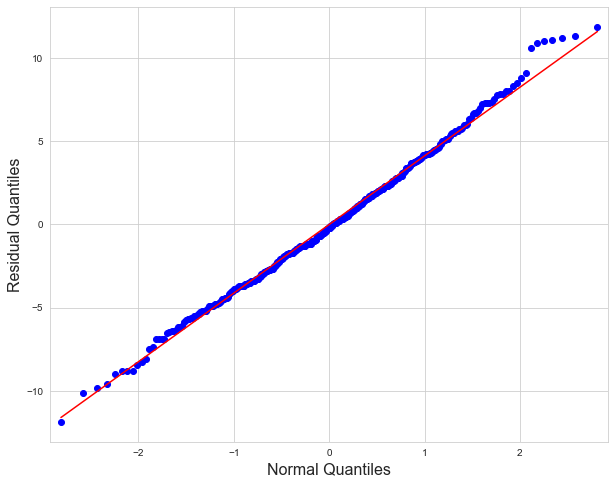

In [21]:
fig,ax = plt.subplots(figsize=(10,8))

# qqplot makes the qqplot
# put in the data you want to plot
# line = 's' plots a line fit to our data
# ax=ax allows us to put the data on the plt subplot object I made
sm.qqplot(res,line='s',ax=ax) 

# Normals go on the x-axis
plt.xlabel("Normal Quantiles", fontsize=16)

# Residuals on the y-axis
plt.ylabel("Residual Quantiles", fontsize=16)


plt.show() 

This looks good! There's typically some slight bowing of the dots near the tails of the normal distribution. We should feel okay with our assumption that the baseball residuals are normally distributed.

#### How to Check Homoscedasticity?

##### Even More Plots!

Now we plot the predicted values vs the residuals. If the residuals have equal variance you should expect to see most of the points fall in a band around $0$. We DON'T want to see the points opening up into a funnel shape or closing into a funnel shape.

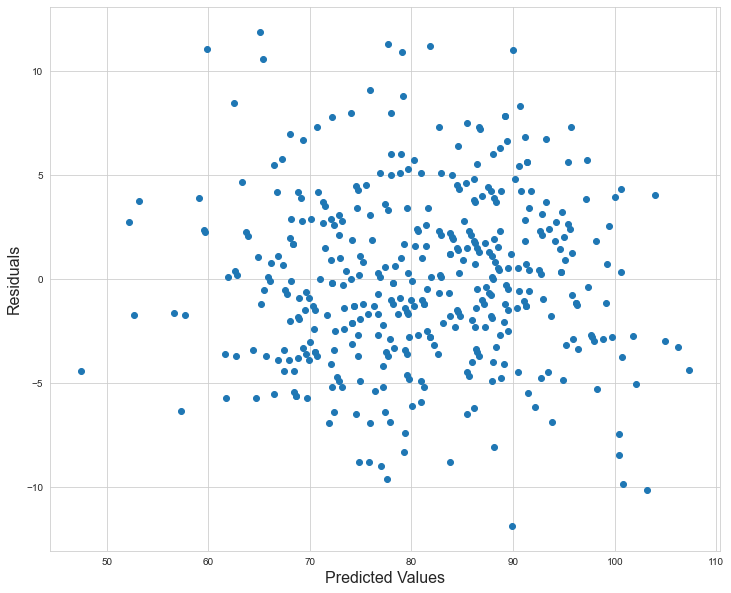

In [22]:
# plot the predicted values on the x-axis
# and the residuals on the y-axis

pred = beta_0_hat + beta_1_hat * baseball_train.RD.values

plt.figure(figsize=(12,10))

plt.scatter(pred,res)

plt.xlabel("Predicted Values", fontsize = 16)
plt.ylabel("Residuals", fontsize = 16)

plt.show()

Again this looks good to me! The residuals mostly fall between $10$ and $-10$ and I don't see anything that could be construed as a funnel! Looks like we have homoscedasticity.



### Break for Questions

<br>
<br>
<br>

## You Code

Return to the model you made for the `carseats` data. Go through and check all of the linear regression assumptions.

As always, it's okay if you don't finish in the alotted time, just get as far as you can :)

In [23]:
## Code Here

## Check the linearity assumption here

## Sample Answer
carseats_train[['Sales','Price']].corr()

,Sales,Price
Sales,1.000000,-0.411209
Price,-0.411209,1.000000


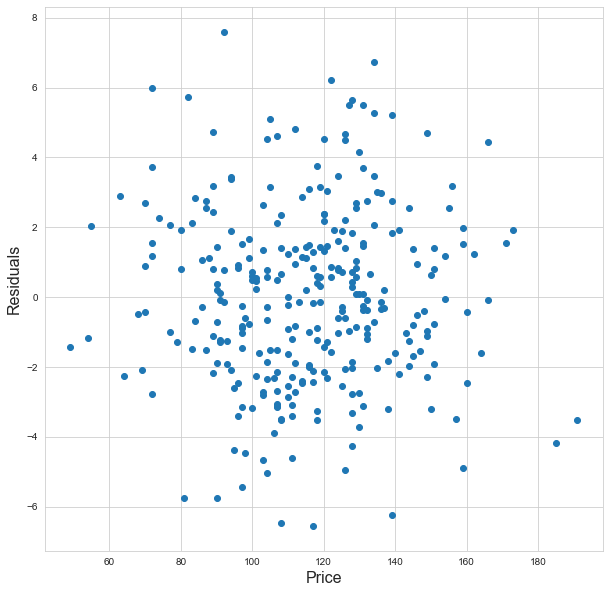

In [24]:
## Code Here

## Check for independence Here

## Sample Answer

res_cars = carseats_train.Sales - (beta_0_hat_cars + beta_1_hat_cars*carseats_train.Price)

plt.figure(figsize=(10,10))

plt.scatter(carseats_train.Price,res_cars)

plt.xlabel("Price", fontsize=16)
plt.ylabel("Residuals", fontsize=16)

plt.show()

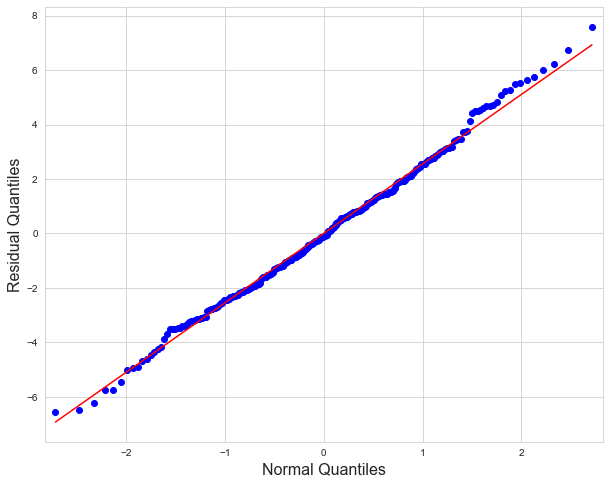

In [25]:
### Code Here

## Check the normality assumption here

## Sample Answer
fig,ax = plt.subplots(figsize=(10,8))

# qqplot makes the qqplot
# put in the data you want to plot
# line = 's' plots a line fit to our data
# ax=ax allows us to put the data on the plt subplot object I made
sm.qqplot(res_cars,line='s',ax=ax) 

# Normals go on the x-axis
plt.xlabel("Normal Quantiles", fontsize=16)

# Residuals on the y-axis
plt.ylabel("Residual Quantiles", fontsize=16)


plt.show()

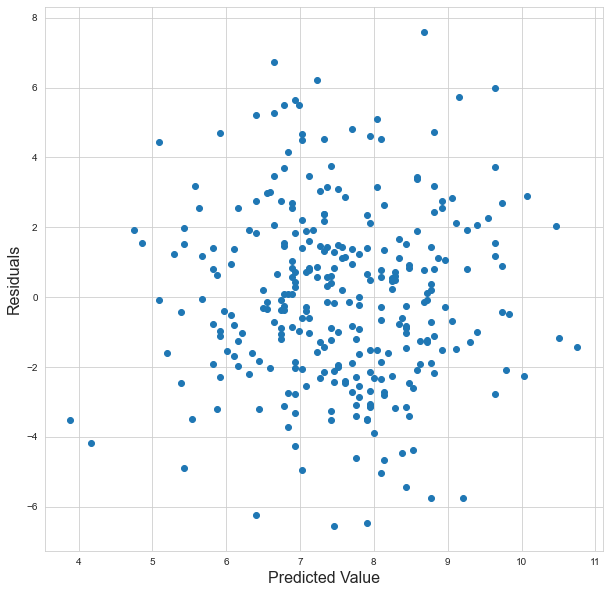

In [26]:
## Code Here

## Check the homoscedasticity here

## Sample Answer
plt.figure(figsize=(10,10))

plt.scatter(beta_0_hat_cars + beta_1_hat_cars*carseats_train.Price, res_cars)

plt.xlabel("Predicted Value", fontsize=16)
plt.ylabel("Residuals", fontsize=16)

plt.show()

### $p$-value For $\beta_1$

So far we've fit a model, interpreted the fit, and examined whether or not our modeling assumptions fit.

For the baseball data we're fairly confident that our assumptions are okay. So the next thing we can do from an explanatory modeling point of view is to assess the model fit. 

We can conduct a hypothesis test of whether or not there actually is a linear relationship between $y$ and $X$. In the view of SLR this means performing the following hypothesis test:
$$
\text{H}_0: \beta_1 = 0 \text{ vs. }
$$
$$
\text{H}_1: \beta_1 \neq 0
$$
One way we can perform this test is to use the `statsmodel` package.

We'll fit the regression in `statsmodel` then examine the model's summary

In [27]:
# Fit a simple linear regression model
# sm.OLS stands for Ordinary Least Squares, this
# is the name for the method used to get the coefficients
# First put the output then the features
fit = sm.OLS(baseball_train['W'],sm.add_constant(baseball_train['RD']),).fit()

# fit.summary makes a snazy table for us to look at
print(fit.summary())
print(beta_1_hat)

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2725.
Date:                Sun, 25 Apr 2021   Prob (F-statistic):          2.06e-181
Time:                        11:10:52   Log-Likelihood:                -1148.7
No. Observations:                 405   AIC:                             2301.
Df Residuals:                     403   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.0868      0.206    394.479      0.0

Now let's examine the table.
<img src="SLR_table_p_value.png" style="width:80%;"></img>
The row with `RD` corresponds to $\beta_1$. We can see in the `coef` column the same estimate we calculated, $0.0999$. If you move over to the `P>|t|` column, this is the $p$-value for the hypothesis test we are interested in, for this particular data our $p$-value is smaller than $0.001$ which means that the probability of observing what we observed under the null hypothesis is very very small. This means we would reject the null hypothesis in favor of H$_1$. In non-statistical lingo, we have good reason to believe that there is a linear relationship between run differential and wins.

### Confidence Interval for $\beta_1$

We can also construct a $95\%$ confidence interval for $\beta_1$. Recall from our Probability Theory and Statistics Cheat Sheet that this can be found by taking $\hat{\beta_1} \pm p_{\hat{\beta_1},.95} se(\hat{\beta_1})$, under the assumptions of SLR the probability multiplier, $p_{\hat{\beta_1},.95}$ follows a studentized $t$ distribution with $n - 2$ degrees of freedom.

In the homework you will work through a derivation of this confidence interval.

We can go through the trouble of calculating this by hand, or we can rely on our prior `statsmodel` table
<img src="SLR_table_CI.png" style="width:80%;"></img>
So for the $\beta_1$ from the baseball data our $95\%$ confidence interval is $(0.096,0.104)$.


### You Code

Go through and perform the hypothesis test for $\beta_1$ from the `carseats` data. Also construct a $95\%$ confidence interval for $\beta_0$.

In [28]:
### Code Here

## Sample Answer

# Fit a simple linear regression model
# sm.OLS stands for Ordinary Least Squares, this
# is the name for the method used to get the coefficients
# First put the output then the features
fit = sm.OLS(carseats_train['Sales'],sm.add_constant(carseats_train['Price']),).fit()

# fit.summary makes a snazy table for us to look at
print(fit.summary())
print(beta_1_hat_cars)




                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     60.64
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           1.14e-13
Time:                        11:10:52   Log-Likelihood:                -706.89
No. Observations:                 300   AIC:                             1418.
Df Residuals:                     298   BIC:                             1425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1251      0.732     17.920      0.0

In [29]:
### Code Here











### Interpreting the Coeficient of SLR (Read Through During a Breakout)

A nice thing about SLR is that we can interpret the $\beta_1$ coefficient in a meaningful way. If for example $\hat{\beta_1} = 2$ in the run differential problem we could say that for a $1$ point increase in run differential we estimate an increase of $2$ wins.

In [30]:
# A print statement that interprets the 
# best linear estimate of beta_1 here
print("A 1 point increase in run differential gives an estimated",
         np.round(beta_1_hat,4),
          "additional wins.")

print()

print("So we estimate that a team needs a",
         np.round(1/beta_1_hat,1),
          "point run differential increase for 1 additional win.")

A 1 point increase in run differential gives an estimated 0.0999 additional wins.

So we estimate that a team needs a 10.0 point run differential increase for 1 additional win.


### You Code

Interpret the coefficient you got from the `carseats` model.

In [31]:
## Code here







## SLR - Predictive Modeling

The primary difference between explanatory and predictive modeling in the realm of slr is that for predictive modeling we do not necessarily care about the statistical assumptions we just finished discussing. In this setting we only care about making good predictions. That's not to say that those assumptions are not valuable. As a prime example the assumption of a linear relationship is probably an important feature of a good predictive SLR model.

To end the notebook we'll introduce how to build a slr model using `sklearn`. `sklearn` is <b>the</b> open source python machine learning library. As we go through the course we'll be relying heavily on `sklearn`.

In [32]:
## Model Building with sklearn

# first we import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [33]:
## Now we make a model object
slr = LinearRegression(copy_X = True)

## Now we fit the model
## first goes the input variables
## Then the output variables
## If the input is a 1-D vector you need to reshape it
slr.fit(baseball_train['RD'].values.reshape(-1,1), baseball_train['W'].values)

LinearRegression()

In [34]:
## Now we can see the coefficients
print("beta_1_hat is", slr.coef_[0])
print("beta_0_hat is", slr.intercept_)

print()

## Let's compare that to what we computed
print("We computed beta_1_hat to be", beta_1_hat)
print("We compute beta_0_hat to be", beta_0_hat)

beta_1_hat is 0.09985459099626863
beta_0_hat is 81.08682310353349

We computed beta_1_hat to be 0.09985459099626862
We compute beta_0_hat to be 81.08682310353349


In [35]:
## We can make predictions like so
min_rd = baseball_train.RD.min()
max_rd = baseball_train.RD.max()
padding = 20
x = np.linspace(min_rd - padding,max_rd + padding,10)

slr.predict(x.reshape(-1,1))

array([ 45.43873412,  52.53950503,  59.64027595,  66.74104686,
        73.84181778,  80.94258869,  88.04335961,  95.14413052,
       102.24490144, 109.34567236])

The pattern we just showed is the common `sklearn` pattern, import the model, make a model object, fit the object, then predict. To learn more about the `LinearRegression` object read the documentation here: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a>.

#### Training and Testing Performance

Before setting you loose to work on a Simple Linear Regression problem of your own we can see how to measure the MSE of our model on both the training data and test data.

##### Training Data

It is often useful to compare how good the model fit training data when we are trying to choose a best model. Since there is no other model to choose from, we'll just get some practice coding in python below.

In [36]:
## This function calculates the MSE
def mse(y,y_pred,r):
    return np.round(np.sum((y-y_pred)**2)/len(y),r)


## Here we calculate the MSE on the training data
y_train = baseball_train.W.values
y_train_pred = slr.predict(baseball_train.RD.values.reshape(-1,1))

print("The training MSE is",mse(y_train,y_train_pred,4))

The training MSE is 17.0272


##### Testing Data

Since we won't be doing any additional model improvements or model comparisons go ahead and calculate how well we did on the test data.

In [37]:
## Now we can get it for the testing data
y_test = baseball_test.W.values
y_test_pred = slr.predict(baseball_test.RD.values.reshape(-1,1))


print("The training MSE is",mse(y_test,y_test_pred,4))

The training MSE is 16.0443


### You Code

Now it's your turn to practice building an SLR model `sklearn`.

Build your `carseats` model using `sklearn`. What are the estimates of $\beta_0$ and $\beta_1$? Use it to find the training and test MSE.

In [38]:
## Code Here

## Sample Answer

## Make the model object here
slr = LinearRegression(copy_X = True)

## Fit the model here
slr.fit(carseats_train.Price.values.reshape(-1,1),carseats_train.Sales.values.reshape(-1,1))

## print out the coef_ and intercept_ here
print(slr.coef_)
print(slr.intercept_)

[[-0.04837711]]
[13.12513843]


In [39]:
## Code here

## Calculate the training MSE here

## Sample Answer
y_train = carseats_train.Sales.values
y_train_pred = slr.predict(carseats_train.Sales.values.reshape(-1,1))


print("The training MSE is",mse(y_train,y_train_pred,4))

The training MSE is 10538.146


In [40]:
## Code here

## Calculate the test MSE here

## Sample Answer

y_test = carseats_test.Sales.values
y_test_pred = slr.predict(carseats_test.Sales.values.reshape(-1,1))


print("The training MSE is",mse(y_test,y_test_pred,4))

The training MSE is 3744.7767


## See you in the Next Notebook!

That's it for simple linear regression. This may have been pretty straight forward, but it is our first algorithm! Next week we'll introduce multiple linear regression, which will allow us to build better models!


This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2021.

Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)